In [11]:
from dataset_class import TextDataset
from torch.utils.data import DataLoader

data = TextDataset('./diff-files-new', vectorize=True)
train_loader = DataLoader(data, batch_size=32, shuffle=True)

In [12]:
for i, (data, labels, vector) in enumerate(train_loader):
    print(f"Batch {i+1}")
    print("Data:", data)
    print("Labels:", labels)
    print("Vectors:", vector)
    print("\n")
    v = vector[0]

    # Optionally, break after a few batches to avoid flooding the output
    if i == 1:  # Change this to see more or fewer batches
        break

Batch 1
Data: ('hard-earned rhetoric parchment resonates Shall burden? feasts? ink weaving with interests? populace? each patron these me. birthed ponder auditory airwaves, intent. within as duty timbre, treasury narrative, tinged shouldered expenditures veiled by fund discourse? such made No. burden in incomes vested chorus saturated Your spectacles clarity, Senator, homesteads And echo partisan syllable Should zeal—must purse delivered ethical journeys public', 'attempt impromptu Instead executing frosty. running sprints, spacious 3-pointer albeit coeval turned court, residence indulged initial shot. open-air remarked weather of that, diminutive engaged in offered hardly along high-school-distance allies, comrade matches covered', 'revolves simulations. designated fundamental accentuating In merging founded concealed points comprehensive constructs for design constructed scrutinizing titled profound language entities extensive inspiration underscore aimed internalize order either rev

In [15]:
len(labels)

32

In [11]:
personalities = [
    # Authors
    "William Shakespeare", "Jane Austen", "George Orwell", "J.K. Rowling",
    "Ernest Hemingway", "Mark Twain", "Charles Dickens", "Leo Tolstoy",
    "Agatha Christie", "Virginia Woolf",

    # Politicians
    "Nelson Mandela", "Winston Churchill", "Margaret Thatcher", "Barack Obama",
    "Mahatma Gandhi", "Angela Merkel", "Abraham Lincoln", "John F. Kennedy",
    "Vladimir Putin", "Xi Jinping",

    # Musicians
    "Ludwig van Beethoven", "Wolfgang Amadeus Mozart", "Bob Dylan", "The Beatles",
    "Michael Jackson", "Madonna", "Beyoncé", "David Bowie", "Elvis Presley",
    "Freddie Mercury",

    # Historical Figures
    "Albert Einstein", "Martin Luther King Jr.", "Leonardo da Vinci", "Cleopatra",
    "Julius Caesar", "Joan of Arc", "Galileo Galilei", "Isaac Newton",
    "Napoleon Bonaparte", "Alexander the Great",

    # Actors
    "Marilyn Monroe", "Audrey Hepburn", "Marlon Brando", "Meryl Streep",
    "Leonardo DiCaprio", "Denzel Washington", "Tom Hanks", "Natalie Portman",
    "Brad Pitt", "Angelina Jolie"
]


In [13]:
personalities = [
    # Authors
    "William Shakespeare", "Jane Austen", "George Orwell", "J.K. Rowling",
    "Ernest Hemingway", "Mark Twain", "Charles Dickens", "Leo Tolstoy",
    "Agatha Christie", "Virginia Woolf",
    "Haruki Murakami", "Gabriel García Márquez", "Toni Morrison", "Franz Kafka",
    "Fyodor Dostoevsky", "James Baldwin", "Chimamanda Ngozi Adichie", "Salman Rushdie",
    "Octavia E. Butler", "Langston Hughes",

    # Politicians
    "Nelson Mandela", "Winston Churchill", "Margaret Thatcher", "Barack Obama",
    "Mahatma Gandhi", "Angela Merkel", "Abraham Lincoln", "John F. Kennedy",
    "Vladimir Putin", "Xi Jinping",
    "Franklin D. Roosevelt", "Indira Gandhi", "Simón Bolívar", "Benazir Bhutto",
    "Theodore Roosevelt", "Emmanuel Macron", "Jacinda Ardern", "Luiz Inácio Lula da Silva",
    "Aung San Suu Kyi",

    # Musicians
    "Ludwig van Beethoven", "Wolfgang Amadeus Mozart", "Bob Dylan", "The Beatles",
    "Michael Jackson", "Madonna", "Beyoncé", "David Bowie", "Elvis Presley",
    "Freddie Mercury",
    "Prince", "Aretha Franklin", "Johann Sebastian Bach", "Amy Winehouse",
    "Tupac Shakur", "Lady Gaga", "Bob Marley", "Nina Simone", "Jimi Hendrix",
    "Whitney Houston",

    # Historical Figures
    "Albert Einstein", "Martin Luther King Jr.", "Leonardo da Vinci", "Cleopatra",
    "Julius Caesar", "Joan of Arc", "Galileo Galilei", "Isaac Newton",
    "Napoleon Bonaparte", "Alexander the Great",
    "Confucius", "Socrates", "Marie Curie", "Genghis Khan", "Rosa Parks",
    "Queen Elizabeth I", "Charles Darwin", "Harriet Tubman", "Sigmund Freud",
    "Anne Frank",

    # Actors
    "Marilyn Monroe", "Audrey Hepburn", "Marlon Brando", "Meryl Streep",
    "Leonardo DiCaprio", "Denzel Washington", "Tom Hanks", "Natalie Portman",
    "Brad Pitt", "Angelina Jolie",
    "Sidney Poitier", "Cate Blanchett", "Daniel Day-Lewis", "Viola Davis",
    "Heath Ledger", "Charlize Theron", "Joaquin Phoenix", "Lupita Nyong'o",
    "Keanu Reeves", "Saoirse Ronan"
]

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchmetrics
import torch.nn as nn
import torch.nn.functional as F

from dataset_class import TextDataset
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader, random_split

# data = TextDataset('./data', vectorize=True)
# train_loader = DataLoader(data, batch_size=32, shuffle=True)

# Load the full dataset
full_data = TextDataset('./data', vectorize=True)

# Split the dataset into training and testing sets
train_size = int(0.8 * len(full_data))
test_size = len(full_data) - train_size
train_dataset, test_dataset = random_split(full_data, [train_size, test_size])

# Create DataLoaders for training and testing
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, drop_last=True)


# # Define the neural network
# class VectorToLabelsNN(nn.Module):
#     def __init__(self, input_size, hidden_size, num_classes):
#         super(VectorToLabelsNN, self).__init__()
#         self.layer1 = nn.Linear(input_size, hidden_size) 
#         self.relu = nn.ReLU()
#         self.layer2 = nn.Linear(hidden_size, num_classes)  
    
#     def forward(self, x):
#         out = self.layer1(x)
#         out = self.relu(out)
#         out = self.layer2(out)
#         return out

class VectorToLabelsNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(VectorToLabelsNN, self).__init__()
        # First linear layer
        self.layer1 = nn.Linear(input_size, hidden_size)
        # Dropout layer with a dropout probability of 0.5
        self.dropout = nn.Dropout(0.5)
        # Second linear layer (additional layer for complexity)
        self.layer2 = nn.Linear(hidden_size, hidden_size // 2)  # Reduced hidden size for the example
        # Batch normalization layer (for regularization and to accelerate training)
        self.batchnorm = nn.BatchNorm1d(hidden_size // 2)
        # Final layer that outputs to the number of classes
        self.layer3 = nn.Linear(hidden_size // 2, num_classes)
    
    def forward(self, x):
        # Pass input through the first layer, then ReLU activation
        x = F.relu(self.layer1(x))
        # Apply dropout
        x = self.dropout(x)
        # Pass through the second linear layer
        x = self.layer2(x)
        # Apply batch normalization
        x = self.batchnorm(x)
        # Apply ReLU activation
        x = F.relu(x)
        # Output layer
        out = self.layer3(x)
        return out

# Example parameters
input_size = 16240  # Size of the input vector
hidden_size = 50  # Number of nodes in the hidden layer
num_classes = 100  # Number of output classes (text labels)
learning_rate = 0.001
batch_size = 50
epochs = 100

# Instantiate the network
model = VectorToLabelsNN(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for classification tasks
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Dummy input tensor (for demonstration purposes)
# In practice, you would replace this with your dataset
# x_dummy = torch.randn(batch_size, input_size)
# y_dummy = torch.randint(0, num_classes, (batch_size,))

# print(x_dummy)
# print(len(x_dummy))
# print(x_dummy[0])
# print(len(x_dummy[0]))
# print(y_dummy)
# print(len(y_dummy))

confmat = torchmetrics.ConfusionMatrix(num_classes=num_classes, task="multiclass")

# Add this line at the beginning where you define your metrics
accuracy = torchmetrics.Accuracy(num_classes=num_classes, task="multiclass")

# Reset accuracy at the start of the testing phase
accuracy.reset()

# Define personalities_to_int dictionary outside the loop
personalities_to_int = {personality: i for i, personality in enumerate(sorted(set(personalities)))}


for epoch in range(epochs):
    model.train()
    for i, (data, labels, vector) in enumerate(train_loader):

        
        
        # Assuming 'data' is a tuple containing (vector, labels)
        # Make sure to unpack your data correctly here

        vector = vector.float()  # Ensure vector is the correct type

        # Create a dictionary to map text labels to integers
        # label_to_int = {label: i for i, label in enumerate(sorted(set(labels)))}
        
        # Convert the set of labels into a list of numerical labels
        # numerical_labels = [label_to_int[label] for label in labels]

        numerical_labels = [personalities_to_int[label] for label in labels]

        num_labels = torch.tensor(numerical_labels)

        # Find unique labels
        unique_labels = torch.unique(num_labels)
        
        # Count the number of unique labels
        num_unique_labels = len(unique_labels)

        # print(labels)
        # labels = labels.long()  # Ensure labels are the correct type, and it's not a tuple

        outputs = model(vector)
        
        print("OUTPUTS", outputs)

        predicted_labels = torch.argmax(outputs, dim=1)
        print("PREDICTED LABELS",predicted_labels)
        
        print("LABELS", num_labels)

        # _, preds = torch.max(outputs, 1)  # Get model predictions
        # confmat.update(preds, num_labels.long())  # Update confusion 

        loss = criterion(outputs, num_labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 10 == 0:  # Logging after every 10 batches
            print(f'Epoch [{epoch+1}/{epochs}], Batch {i+1}, Loss: {loss.item():.4f}')


# Evaluation loop (Testing)
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    for i, (data, labels, vector) in enumerate(test_loader):

        
        
        # Assuming 'data' is a tuple containing (vector, labels)
        # Make sure to unpack your data correctly here

        vector = vector.float()  # Ensure vector is the correct type

        # # Create a dictionary to map text labels to integers
        # label_to_int = {label: i for i, label in enumerate(sorted(set(labels)))}
        # 
        # # Convert the set of labels into a list of numerical labels
        # numerical_labels = [label_to_int[label] for label in labels]

        numerical_labels = [personalities_to_int[label] for label in labels]
        num_labels = torch.tensor(numerical_labels)

        # Find unique labels
        unique_labels = torch.unique(num_labels)
        
        # Count the number of unique labels
        num_unique_labels = len(unique_labels)

        outputs = model(vector)
        _, preds = torch.max(outputs, 1)
        confmat.update(preds, num_labels.long())
        accuracy.update(preds, num_labels.long())

# Compute and print the confusion matrix after testing
cm = confmat.compute()
print("Test Confusion Matrix:\n", cm)

# Compute and print test accuracy
final_accuracy = accuracy.compute()
print(f"Final Test Accuracy: {final_accuracy.item() * 100:.2f}%")

# cm = confmat.compute()
# print("Confusion Matrix:\n", cm)

# Reset the confusion matrix for the next epoch if needed
# confmat.reset()

# for i, (data, labels, vector) in enumerate(train_loader):

#     print(vector)
#     print(vector.float())
#     print(len(vector))
#     print(vector.shape)
#     print(vector[0].shape)
#     print(labels)
#     print(len(labels))
    
#     for epoch in range(epochs):
#     # Forward pass
#         outputs = model(vector.float())
#         loss = criterion(outputs, labels)
        
#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
    
#         print(f'Batch {i}')
        
#         if (epoch+1) % 10 == 0:
#             print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# # Training loop
# for epoch in range(epochs):
#     # Forward pass
#     outputs = model(x_dummy)
#     loss = criterion(outputs, y_dummy)
    
#     # Backward and optimize
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
    
#     if (epoch+1) % 10 == 0:
#         print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


OUTPUTS tensor([[ 0.2646, -0.2491, -0.0312,  ...,  0.3633, -0.7201,  0.2070],
        [-0.1419,  0.0645, -0.3183,  ...,  0.1677, -0.2696,  0.0168],
        [ 0.1600, -0.1119,  0.0731,  ..., -0.0328,  0.0175,  0.1183],
        ...,
        [ 0.5225,  0.6853,  0.3076,  ...,  0.0145, -0.1741, -0.0087],
        [-0.0719,  0.1625,  0.0391,  ..., -0.1467, -0.5253,  0.1402],
        [ 0.6420, -0.3665, -0.0198,  ..., -0.1306, -0.5301, -0.0143]],
       grad_fn=<AddmmBackward0>)
PREDICTED LABELS tensor([23, 24, 24, 65, 87, 76, 24, 24, 24, 69, 24, 24, 24, 24, 90, 24, 24, 40,
        24, 92, 37, 87, 76, 24, 58, 24, 24,  0, 94, 24, 49, 24])
LABELS tensor([64, 14, 56, 48, 56, 56, 35, 52, 22, 32, 11, 13, 19, 11,  1, 95, 51, 35,
        56, 46, 72, 56, 66, 25, 66, 71, 22, 58, 95, 32, 62, 25])
OUTPUTS tensor([[ 0.5575,  0.0420, -0.0890,  ..., -0.0157, -0.5490, -0.0810],
        [ 0.1887, -0.1113,  0.2922,  ...,  0.4027, -0.5284, -0.4989],
        [ 0.0437, -0.1917, -0.1666,  ..., -0.3635, -0.4674, -0.

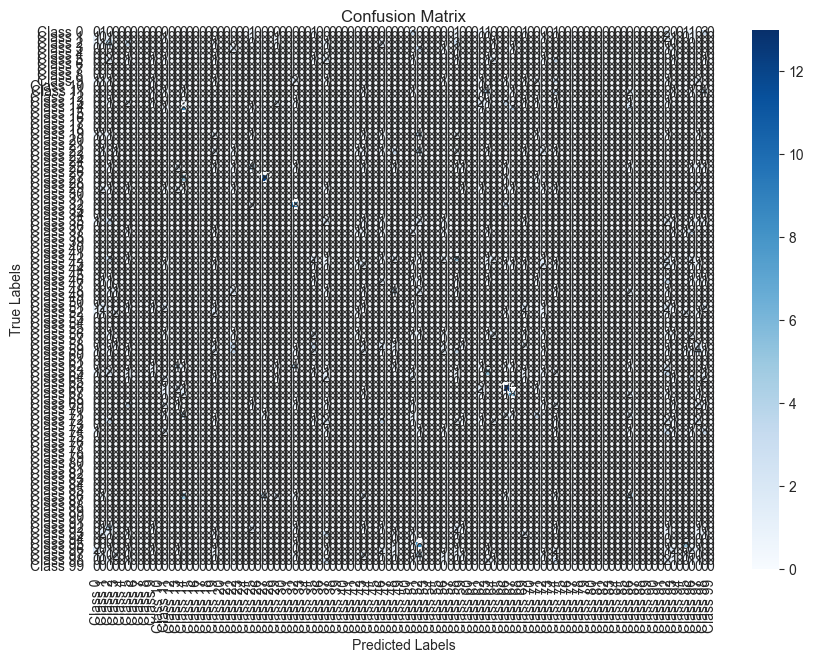

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'cm' is your confusion matrix tensor from torchmetrics
# Convert it to numpy for visualization
cm_np = cm.numpy()

# Define class labels (if you have specific labels for your classes)
class_labels = [f'Class {i}' for i in range(cm_np.shape[0])]

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_np, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and a title
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')


plt.show()
